#**dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset/JulClothing/translateJul.csv")
dataset

,Review,Review_English
0,ukur pas tinggi badan 160 - 170 cm,fit measure height 160 - 170 cm
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according to the photo is only thin if the pho...
2,155 48 i love it,155 48 i love it
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height 161 - 170 cm body weight 5...
4,ukur pas,measure fit
...,...,...
372,barang nya bagus sablon ny keren bahan nya ade...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
373,ukur pas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
374,terima kasih terima kasih,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
375,baju pas nggak nerawang untukuk harga gin udah...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


#**packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#**teks cleaning**

In [ ]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
# Hapus baris dari 358 hingga baris terakhir
dataset = dataset.drop(dataset.index[362:])

dataset


,Review,Review_English
0,ukur pas tinggi badan 160 - 170 cm,fit measure height 160 - 170 cm
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according to the photo is only thin if the pho...
2,155 48 i love it,155 48 i love it
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height 161 - 170 cm body weight 5...
4,ukur pas,measure fit
...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good ...
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good ...
359,kaos tipis,thin t-shirt
360,ukur pas bahan oke cepet sampe,measure the fit of the material okay fast until


#**lebeling tokenize processing**

In [ ]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [ ]:
dataset['Review'] = dataset['Review'].astype(str)
dataset['Review_English'] = dataset['Review_English'].astype(str)

In [ ]:
dataset["Review_English"] = dataset["Review_English"].apply(lambda Text: Text_Cleaning(Text))
dataset["Review_English"] = dataset["Review_English"].apply(lambda Text: Text_Processing(Text))

#**sentiment**

In [ ]:
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen dari sebuah kata
def get_sentiment(word):
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return "Positif"
    elif analysis.sentiment.polarity == 0:
        return "Netral"
    elif analysis.sentiment.polarity < 0:
        return "Negatif"

# Mengambil review dari dataset
data_review = list(dataset['Review_English'])

# List untuk menyimpan hasil klasifikasi sentimen kata
hasil_sentimen = []

# Iterasi setiap review
for review in data_review:
    kata_review = TextBlob(review).words
    sentimen_review = []

    # Iterasi setiap kata dalam review
    for kata in kata_review:
        sentimen_kata = get_sentiment(kata)
        sentimen_review.append(sentimen_kata)

    hasil_sentimen.append(sentimen_review)

# Menambahkan kolom baru ke dataset
dataset['Sentimen_Kata'] = hasil_sentimen

In [ ]:
from textblob import TextBlob

data_review = list(dataset['Review_English'])
kata_negatif = set()
kata_netral = set()
kata_positif = set()

for review in data_review:
    analysis = TextBlob(review)
    kata_review = analysis.words
    for kata in kata_review:
        kata_analysis = TextBlob(kata)
        if kata_analysis.sentiment.polarity < 0:
            kata_negatif.add(kata)
        elif kata_analysis.sentiment.polarity == 0:
            kata_netral.add(kata)
        else:
            kata_positif.add(kata)

print("Kata-kata negatif:")
print(kata_negatif)

print("\nKata-kata netral:")
print(kata_netral)

print("\nKata-kata positif:")
print(kata_positif)

Kata-kata negatif:
{'bad', 'black', 'narrow', 'sorry', 'yarn', 'stretched', 'ordinary', 'disappointed', 'common', 'unfortunately', 'thick', 'slightly', 'little', 'long', 'small', 'wrong', 'fluffy', 'usually', 'tight', 'thin', 'delicate', 'duh', 'loose', 'expected'}

Kata-kata netral:
{'sizing', 'know', 'jx', 'trima', 'kang', 'stain', 'xl', 'rather', 'kecil', 'shoulder', 'middle', 'sultry', 'collar', 'bungakusan', 'larger', 'shop', 'package', 'close', 'ba', 'aga', 'even', 'kapok', 'ash', 'untuk', 'pdahal', 'bkal', 'ny', 'packing', 'pi', 'sufficient', 'ingredient', 'measurement', 'shirt', 'blur', 'cooperation', 'sell', 'sampai', 'kaya', 'attitude', 'material', 'mantabs', 'ngepres', 'bit', 'back', 'mainstream', 'aja', 'replaced', 'koq', 'coarse', 'increase', 'big', 'plier', 'lucuuuu', 'arrived', 'th', 'low', 'pda', 'express', 'lp', 'tipi', 'mksh', 'priced', 'subscribe', 'nan', 'sent', 'standard', 'feel', 'speed', 'ssmpit', 'neatly', 'always', 'fitkk', 'color', 'hoho', 'pickedup', 'stock',

In [ ]:
dataset

,Review,Review_English,Sentimen_Kata
0,ukur pas tinggi badan 160 - 170 cm,fit measure height cm,"[Positif, Netral, Netral, Netral]"
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according photo thin photo thick material acco...,"[Netral, Netral, Negatif, Netral, Negatif, Net..."
2,155 48 i love it,love,[Positif]
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr..."
4,ukur pas,measure fit,"[Netral, Positif]"
...,...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr..."
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr..."
359,kaos tipis,thin shirt,"[Negatif, Netral]"
360,ukur pas bahan oke cepet sampe,measure fit material okay fast,"[Netral, Positif, Netral, Positif, Positif]"


In [ ]:
import pandas as pd
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen dari sebuah kata
def get_sentiment(word):
    analysis = TextBlob(word)
    if analysis.sentiment.polarity > 0:
        return "Positif"
    elif analysis.sentiment.polarity == 0:
        return "Netral"
    elif analysis.sentiment.polarity < 0:
        return "Negatif"

# Fungsi untuk mengekstrak kata-kata sesuai sentimen dari review
def extract_sentiment_words(review, sentiment):
    kata_review = TextBlob(review).words
    kata_sentimen = [kata for kata in kata_review if get_sentiment(kata) == sentiment]
    return kata_sentimen

# Menambahkan kolom baru untuk kata-kata positif
dataset['Kata_Positif'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Positif"))

# Menambahkan kolom baru untuk kata-kata negatif
dataset['Kata_Negatif'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Negatif"))

# Menambahkan kolom baru untuk kata-kata netral
dataset['Kata_Netral'] = dataset['Review_English'].apply(lambda x: extract_sentiment_words(x, "Netral"))

dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral
0,ukur pas tinggi badan 160 - 170 cm,fit measure height cm,"[Positif, Netral, Netral, Netral]",[fit],[],"[measure, height, cm]"
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according photo thin photo thick material acco...,"[Netral, Netral, Negatif, Netral, Negatif, Net...",[],"[thin, thick]","[according, photo, photo, material, according,..."
2,155 48 i love it,love,[Positif],[love],[],[]
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]"
4,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure]
...,...,...,...,...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor..."
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor..."
359,kaos tipis,thin shirt,"[Negatif, Netral]",[],[thin],[shirt]
360,ukur pas bahan oke cepet sampe,measure fit material okay fast,"[Netral, Positif, Netral, Positif, Positif]","[fit, okay, fast]",[],"[measure, material]"


In [ ]:
dataset2 = list(dataset['Review_English'])
polaritas = 0

status = []
total_positif = total_netral = total_negatif = total = 0
for i, review in enumerate(data_review):
  analysis = TextBlob(review)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append("Positif")
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append("Netral")
  elif analysis.sentiment.polarity < 0.0:
    total_negatif += 1
    status.append("Negatif")

  total += 1

print(f'Hasil Analisis Data JulCloth:\nPositif = {total_positif}\nNegatif = {total_negatif}\nNetral = {total_netral}')
print(f'\nTotal Data {total}')

Hasil Analisis Data JulCloth:
Positif = 250
Negatif = 65
Netral = 47

Total Data 362


In [ ]:
dataset['Klasifikasi'] = status
dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi
0,ukur pas tinggi badan 160 - 170 cm,fit measure height cm,"[Positif, Netral, Netral, Netral]",[fit],[],"[measure, height, cm]",Positif
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according photo thin photo thick material acco...,"[Netral, Netral, Negatif, Netral, Negatif, Net...",[],"[thin, thick]","[according, photo, photo, material, according,...",Negatif
2,155 48 i love it,love,[Positif],[love],[],[],Positif
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]",Positif
4,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif
...,...,...,...,...,...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif
359,kaos tipis,thin shirt,"[Negatif, Netral]",[],[thin],[shirt],Negatif
360,ukur pas bahan oke cepet sampe,measure fit material okay fast,"[Netral, Positif, Netral, Positif, Positif]","[fit, okay, fast]",[],"[measure, material]",Positif


#**infromasi sentiment**

In [ ]:
dataset.describe(include="all")

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi
count,362,362,362,362,362,362,362
unique,281,270,181,121,35,250,3
top,ukur pas,measure fit,"[Netral, Positif]",[],[],[measure],Positif
freq,41,41,43,93,258,44,250


#**visualisasi klasifikasi**

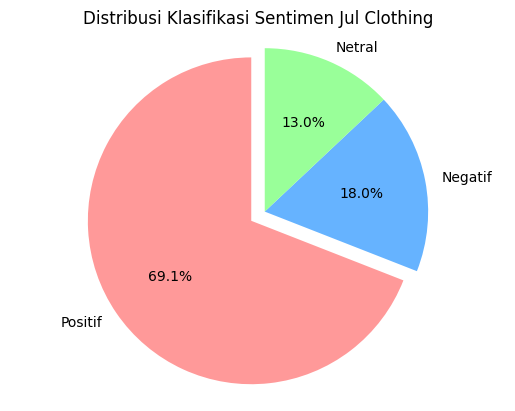

In [ ]:
# Menghitung jumlah masing-masing kategori dalam kolom 'Klasifikasi'
class_counts = dataset['Klasifikasi'].value_counts()

#kolom yang tanggapan paling banyak muncul bakal di potong
explode = [0.1 if count == class_counts.max() else 0 for count in class_counts]


# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90,explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menambahkan judul
plt.title("Distribusi Klasifikasi Sentimen Jul Clothing")

# Menampilkan plot
plt.show()

#**polaritasi teks**


* Sentimen positif: Sebanyak 40% ulasan memiliki skor polaritas 0,8 atau lebih tinggi. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang sangat positif.

* Sentimen netral: Sebanyak 30% ulasan memiliki skor polaritas antara 0,2 dan 0,8. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang netral atau agak positif.

* Sentimen negatif: Sebanyak 30% ulasan memiliki skor polaritas 0 atau lebih rendah. Hal ini menunjukkan bahwa ulasan tersebut memiliki sentimen yang netral atau agak negatif.

In [ ]:
dataset["polarity"] = dataset["Review_English"].map(lambda Text: TextBlob(Text).sentiment.polarity)

In [ ]:
dataset[["Review_English","polarity"]]

,Review_English,polarity
0,fit measure height cm,0.400000
1,according photo thin photo thick material acco...,-0.350000
2,love,0.500000
3,fit measure height cm body weight kg,0.400000
4,measure fit,0.400000
...,...,...
357,response service send good packing neat good g...,0.700000
358,response service send good packing neat good g...,0.700000
359,thin shirt,-0.400000
360,measure fit material okay fast,0.366667


In [ ]:
dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi,polarity
0,ukur pas tinggi badan 160 - 170 cm,fit measure height cm,"[Positif, Netral, Netral, Netral]",[fit],[],"[measure, height, cm]",Positif,0.400000
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according photo thin photo thick material acco...,"[Netral, Netral, Negatif, Netral, Negatif, Net...",[],"[thin, thick]","[according, photo, photo, material, according,...",Negatif,-0.350000
2,155 48 i love it,love,[Positif],[love],[],[],Positif,0.500000
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]",Positif,0.400000
4,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif,0.400000
...,...,...,...,...,...,...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif,0.700000
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif,0.700000
359,kaos tipis,thin shirt,"[Negatif, Netral]",[],[thin],[shirt],Negatif,-0.400000
360,ukur pas bahan oke cepet sampe,measure fit material okay fast,"[Netral, Positif, Netral, Positif, Positif]","[fit, okay, fast]",[],"[measure, material]",Positif,0.366667


#**visualisasi**

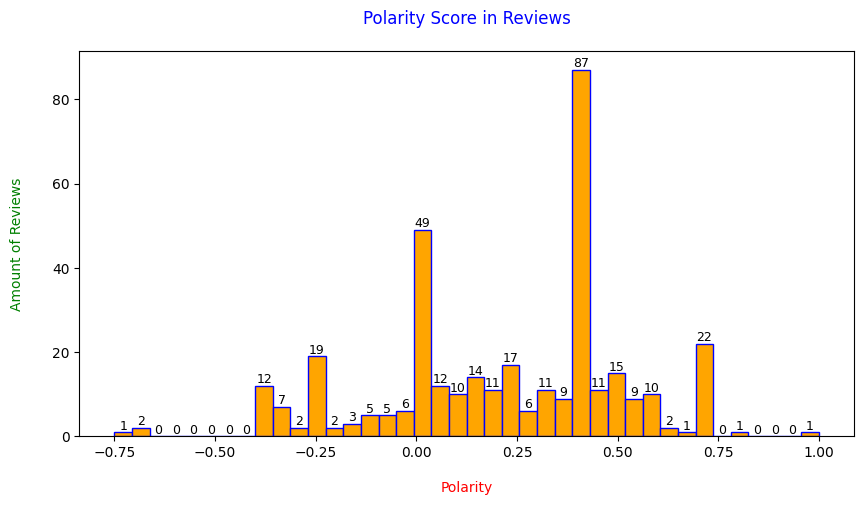

In [ ]:
ax = dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")


for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

#**jumlah kata dalam setiap riview**

In [ ]:
dataset["word_counts"] = dataset["Review_English"].apply(lambda x: len(str(x).split()))

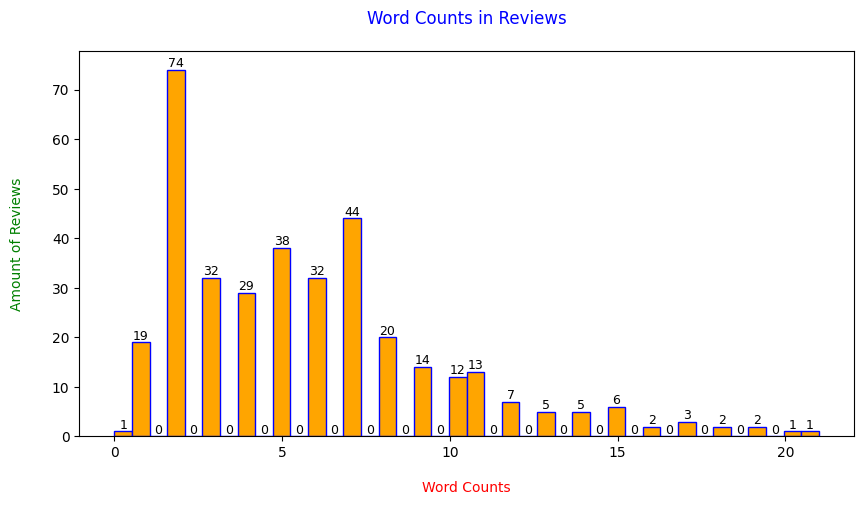

In [ ]:
ax = dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

#**Menghitung jumlah karakter pada masing masing riview**

In [ ]:
dataset["word_counts"] = dataset["Review_English"].apply(lambda x: len(str(x).split()))

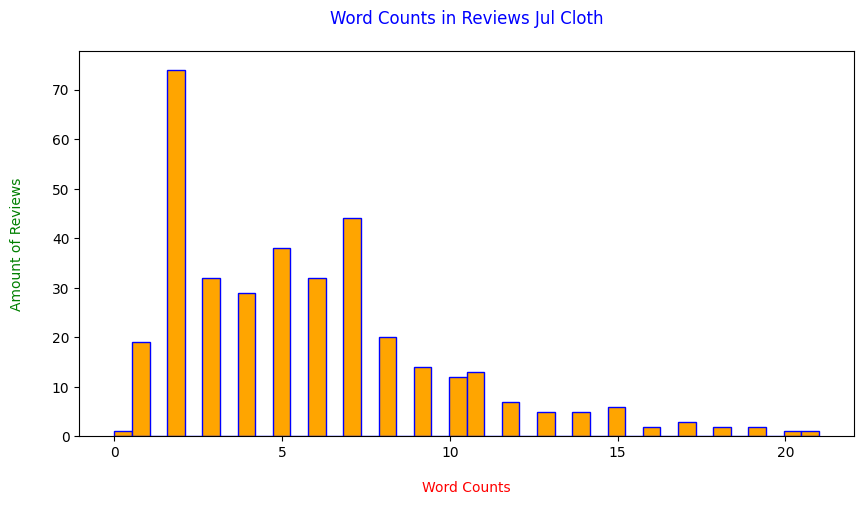

In [ ]:
dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews Jul Cloth", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

#**Frekuensi kata postif Jul**

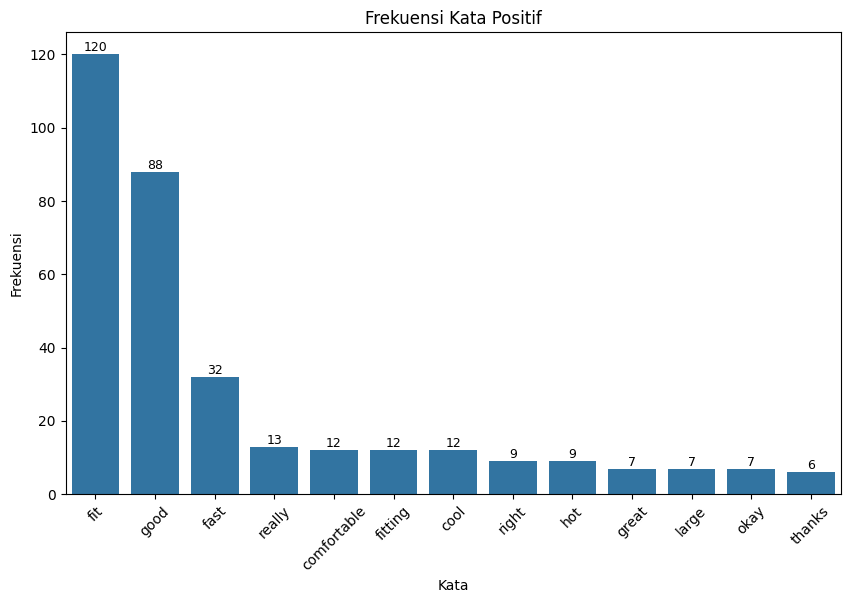

In [ ]:
# Menggabungkan semua kata positif menjadi satu list
all_positive_words = [word for sublist in dataset['Kata_Positif'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_positive_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kata', y='Frekuensi', data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Positif')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()


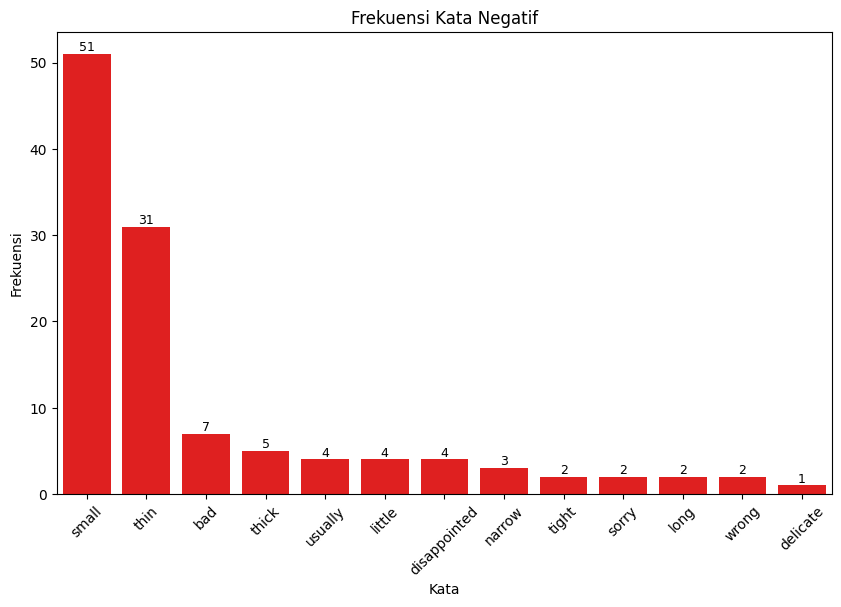

In [ ]:
# Menggabungkan semua kata positif menjadi satu list
all_negatif_words = [word for sublist in dataset['Kata_Negatif'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_negatif_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(color ="red" , x='Kata', y='Frekuensi',data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Negatif')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)


for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

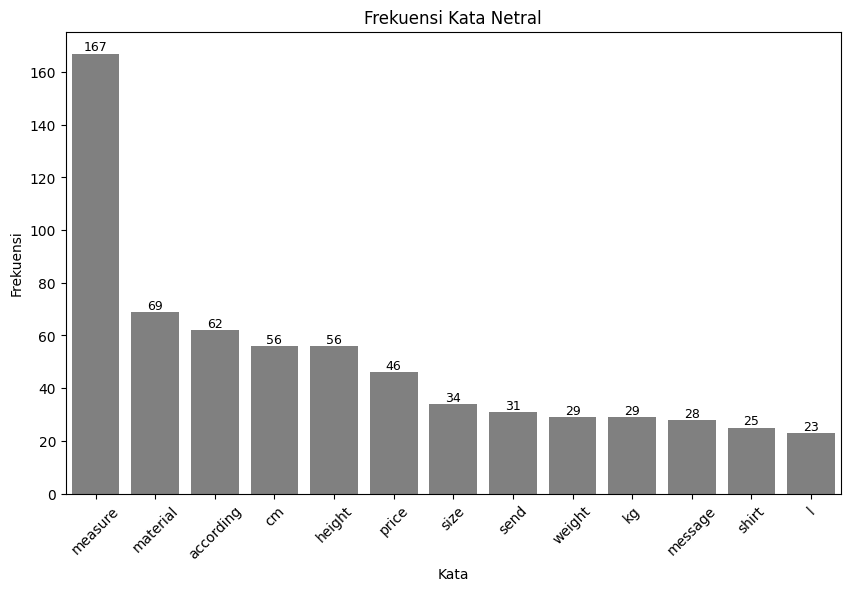

In [ ]:
# Menggabungkan semua kata positif menjadi satu list
all_netral_words = [word for sublist in dataset['Kata_Netral'] for word in sublist]

# Menghitung frekuensi setiap kata
word_counts = Counter(all_netral_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(color ="gray" , x='Kata', y='Frekuensi',data=word_counts_df.sort_values(by='Frekuensi', ascending=False).head(13))
plt.title('Frekuensi Kata Netral')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)

for patch in ax.patches:
    # Mendapatkan koordinat tengah bar
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Menambahkan teks label di atas bar
    ax.text(x, y, str(int(y)), ha='center', va='bottom', fontsize=9, color='black')
plt.show()

#**wordcloud**

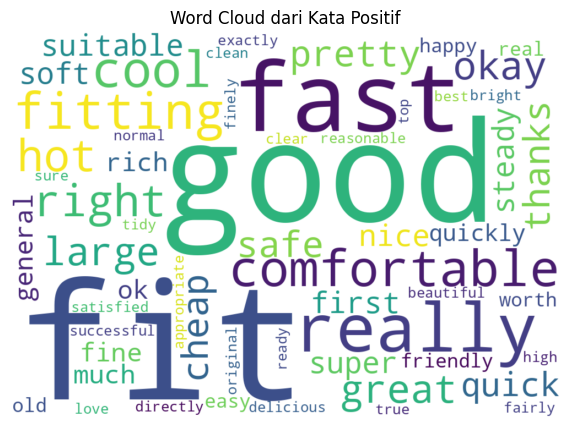

In [ ]:
# Menggabungkan semua kata positif menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Positif']])

# Membuat word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata Positif')
plt.show()

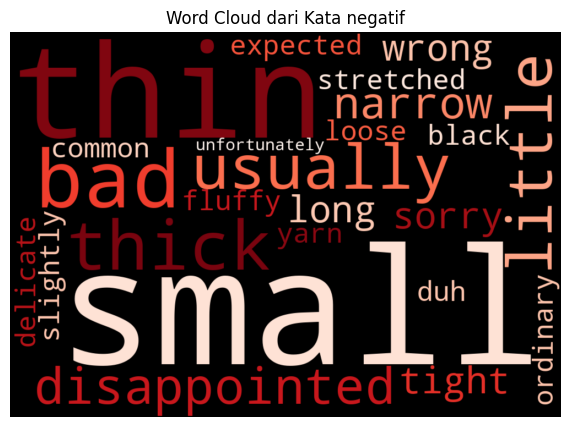

In [ ]:
# Menggabungkan semua kata positif menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Negatif']])

# Membuat word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='black',colormap='Reds').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata negatif')
plt.show()

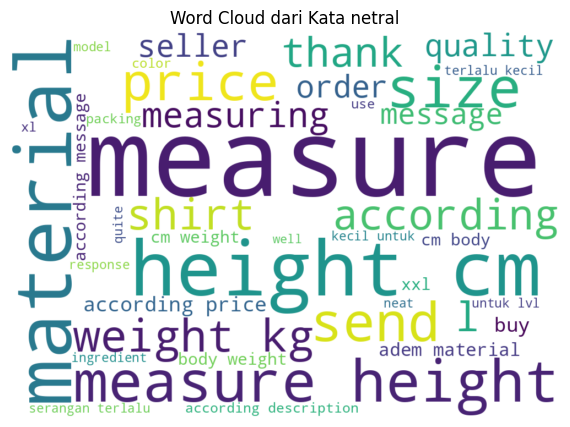

In [ ]:
# Menggabungkan semua kata netral menjadi satu string
all_positive_words = ' '.join([' '.join(sublist) for sublist in dataset['Kata_Netral']])

# Membuat word cloud
wordcloud = WordCloud(max_words = 40,width=1000, height=700, background_color='white').generate(all_positive_words)

# Menampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Kata netral')
plt.show()

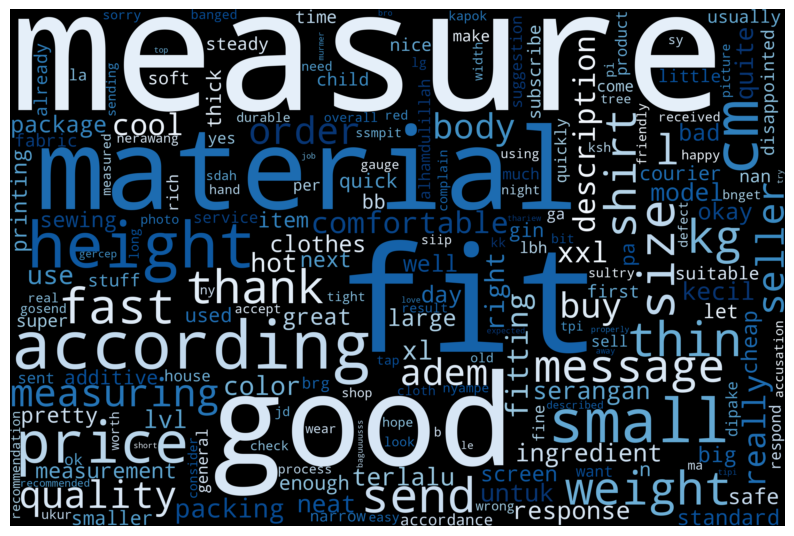

In [ ]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([review for review in dataset['Review_English']])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color = 'black',
    colormap = 'Blues_r',
    collocations = False
).generate(all_words)

plot_cloud(wordcloud)

In [ ]:
dataset

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi,polarity,word_counts
0,ukur pas tinggi badan 160 - 170 cm,fit measure height cm,"[Positif, Netral, Netral, Netral]",[fit],[],"[measure, height, cm]",Positif,0.400000,4
1,sesuai foto cuma tipis aja kl foto kliatan bah...,according photo thin photo thick material acco...,"[Netral, Netral, Negatif, Netral, Negatif, Net...",[],"[thin, thick]","[according, photo, photo, material, according,...",Negatif,-0.350000,8
2,155 48 i love it,love,[Positif],[love],[],[],Positif,0.500000,1
3,ukur pas tinggi badan 161 - 170 cm berat badan...,fit measure height cm body weight kg,"[Positif, Netral, Netral, Netral, Netral, Netr...",[fit],[],"[measure, height, cm, body, weight, kg]",Positif,0.400000,7
4,ukur pas,measure fit,"[Netral, Positif]",[fit],[],[measure],Positif,0.400000,2
...,...,...,...,...,...,...,...,...,...
357,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif,0.700000,10
358,respon layan kirim baik packing rapih barang...,response service send good packing neat good g...,"[Netral, Netral, Netral, Positif, Netral, Netr...","[good, good, good]",[],"[response, service, send, packing, neat, accor...",Positif,0.700000,10
359,kaos tipis,thin shirt,"[Negatif, Netral]",[],[thin],[shirt],Negatif,-0.400000,2
360,ukur pas bahan oke cepet sampe,measure fit material okay fast,"[Netral, Positif, Netral, Positif, Positif]","[fit, okay, fast]",[],"[measure, material]",Positif,0.366667,5


In [ ]:
dataset2 = pd.read_csv("/content/drive/MyDrive/dataset/JulClothing/Data Mentah Jul.csv")
dataset2.head(21).tail(21)

,Produk,Nama,Waktu,Review,Rating
0,Kaos polo polos / Kaos kerah / Kaos wangki,K***i,1 hari lalu,Ukurannya pas Tinggi badan 160 - 170 cm,bintang 5
1,Kaos pria o neck need coffe,Veronica,1 hari lalu,"Sesuai foto, cuma tipis aja.. kl difoto kliata...",bintang 5
2,Croptop Wanita girl - Lengan Pendek Cotton Com...,FVou,2 hari lalu,155/48. I love it!,bintang 5
3,Kaos Polos Wanita Cotton Combed 30s,A***i,2 hari lalu,Ukurannya pas Tinggi badan 161 - 170 cm Berat ...,bintang 5
4,Kaos Polos Wanita Cotton Combed 30s,nia,2 hari lalu,Ukurannya pas,bintang 5
5,Kaos Polos Wanita Cotton Combed 30s,K***O,6 hari lalu,Kaosnya lembuttt Bahanya,bintang 5
6,Kaos polo polos / Kaos kerah / Kaos wangki,rudi,1 minggu lalu,bahan lumayan bagus,bintang 5
7,Kaos pria O-neck nadi,cahyanto,1 minggu lalu,Ukurannya pas,bintang 5
8,Kaos polo polos / Kaos kerah / Kaos wangki,shams,1 minggu lalu,"Ukurannya terlalu kecil, baiknya yg biasa pake...",bintang 5
9,Kaos polo polos / Kaos kerah / Kaos wangki,Arya,1 minggu lalu,Ukurannya pas,bintang 5


#**Frekuensi Kata Negatif Di Kedua Dataset**

In [ ]:
dataset2 = pd.read_csv('/content/drive/MyDrive/dataset/Final Dataset/faithfinal.csv')

In [ ]:
import pandas as pd
from collections import Counter
import re

# Menggabungkan semua kata negatif dari kedua dataset
all_negative_words = [word for sublist in dataset['Kata_Negatif'] for word in sublist] + \
                     [word for sublist in dataset2['Kata_Negatif'] for word in sublist]

# Filter kata-kata untuk menghilangkan simbol aneh dan kata-kata yang hanya terdiri dari satu huruf
filtered_negative_words = [word for word in all_negative_words if len(word) > 1 and re.match(r'^[a-zA-Z]+$', word)]

# Menghitung frekuensi setiap kata
word_counts = Counter(filtered_negative_words)

# Mengonversi hasil ke DataFrame
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Kata', 'Frekuensi'])

# Mengurutkan DataFrame berdasarkan frekuensi secara menurun
word_counts_df_sorted = word_counts_df.sort_values(by='Frekuensi', ascending=False)

# Menampilkan tabel
word_counts_df_sorted.head(10)  # Menampilkan 50 kata negatif teratas

,Kata,Frekuensi
2,small,51
0,thin,31
7,bad,7
1,thick,5
3,usually,4
5,little,4
14,disappointed,4
6,narrow,3
8,tight,2
21,sorry,2


In [ ]:
pattern = r'\b\w*small\w*\b'
pattern2 = r'\b\w*thin\w*\b'
reviews_with_kecil1 = dataset[
    dataset['Review_English'].str.contains(pattern, case=False)
    # &
    # dataset['Review_English'].str.contains(pattern2, case=False)
]
reviews_with_kecil1[["Review","Review_English"]].head(10)

,Review,Review_English
8,ukur terlalu kecil baik biasa pake xl naik jad...,measure small good usually use xl xxl good mat...
10,ukur terlalu kecil banget banget,size small
21,bagus ukur kecil,nice small size
34,bahan tipis ukur l nya ukur m kecil sempit,thin material measure l size small narrow
35,bahan tipis ukur l nya ukur m kecil ssmpit,thin material measure l measure small ssmpit
36,bahan tipis ukur l nya ukur m kecil ssmpit,thin material measure l measure small ssmpit
41,ukur pas ukur terlalu besar ukur terlalu kecil...,fit measure big measure small height cm
42,kecil ukur jahit cukup rapi sesuai harga,small sewing size quite neat according price
43,ukur xl nya kecil bahan tipis sesuai harga l...,measure xl small thin material according price
44,ukur xl nya kecil bahan tipis sesuai harga l...,measure xl small thin material according price


In [ ]:
dataset2['Review_English'] = dataset2['Review_English'].fillna('')

In [ ]:
pattern = r'\b\w*small\w*\b'
pattern2 = r'\b\w*thin\w*\b'
reviews_with_kecil2 = dataset[
    dataset['Review_English'].str.contains(pattern, case=False)
    &
    dataset['Review_English'].str.contains(pattern2, case=False)
]

In [ ]:
reviews_with_kecil2[['Review','Review_English']]

,Review,Review_English
34,bahan tipis ukur l nya ukur m kecil sempit,thin material measure l size small narrow
35,bahan tipis ukur l nya ukur m kecil ssmpit,thin material measure l measure small ssmpit
36,bahan tipis ukur l nya ukur m kecil ssmpit,thin material measure l measure small ssmpit
43,ukur xl nya kecil bahan tipis sesuai harga l...,measure xl small thin material according price
44,ukur xl nya kecil bahan tipis sesuai harga l...,measure xl small thin material according price
164,bahan tipis jahit rapi sesuai harga untukuk se...,material thin neat sewing according price unif...
344,bahan kaos jelek tipis banget size kecil bange...,material shirt thin size small size small fit ...


In [ ]:
combined_df = pd.concat([reviews_with_kecil1, reviews_with_kecil2], ignore_index=True)

combined_df = combined_df[combined_df['Klasifikasi'] == 'Negatif']
combined_df[["Review_English" ,"Klasifikasi"]].head(5)



,Review_English,Klasifikasi
1,size small,Negatif
3,thin material measure l size small narrow,Negatif
4,thin material measure l measure small ssmpit,Negatif
5,thin material measure l measure small ssmpit,Negatif
7,small sewing size quite neat according price,Negatif


In [ ]:

combined_df = combined_df.drop_duplicates(subset='Review', keep='first')


In [ ]:
combined_df = combined_df[combined_df['Klasifikasi'] == 'Negatif']
combined_df[["Review" ,"Klasifikasi"]]

,Review,Klasifikasi
1,ukur terlalu kecil banget banget,Negatif
3,bahan tipis ukur l nya ukur m kecil sempit,Negatif
4,bahan tipis ukur l nya ukur m kecil ssmpit,Negatif
7,kecil ukur jahit cukup rapi sesuai harga,Negatif
8,ukur xl nya kecil bahan tipis sesuai harga l...,Negatif
11,kualitas sesuai dengann harga ga komplain cuma...,Negatif
12,ukur terlalu kecil tinggi badan 171 - 180 cm b...,Negatif
14,ukur lebih kecik size normal mau beli baik amb...,Negatif
15,untukuk anak 14th kecil kualitas bahan lumayan,Negatif
16,ukur l tdk sesuai ukur terlalu kecil,Negatif


In [ ]:
combined_df[["Review_English" ,"Klasifikasi"]].head(5)

,Review_English,Klasifikasi
1,size small,Negatif
3,thin material measure l size small narrow,Negatif
4,thin material measure l measure small ssmpit,Negatif
7,small sewing size quite neat according price,Negatif
8,measure xl small thin material according price,Negatif


In [ ]:
combined_df[["Review_English" ,"Klasifikasi"]].tail(5)

,Review_English,Klasifikasi
48,measure small l,Negatif
49,material shirt thin size small size small fit ...,Negatif
50,good material send fast one day unfortunately ...,Negatif
68,steady mess abcdefgood,Negatif
87,etc message april came th customer service clo...,Negatif


In [ ]:
combined_df[["Review","Klasifikasi"]].to_excel('combined_df2.xlsx', index=False)

In [ ]:
pattern3 = r'\b\w*wrong\w*\b'

reviews_with_kecil3 = dataset2[
    dataset['Review'].str.contains(pattern3, case=False)
    #&
    #dataset['Review_English'].str.contains(pattern2, case=False)
]

In [ ]:
reviews_with_kecil3

,Review,Review_English,Sentimen_Kata,Kata_Positif,Kata_Negatif,Kata_Netral,Klasifikasi,polarity,word_counts
